In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import load_iris
import pickle
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("C:/Users/rajpu/OneDrive/Desktop/Bank Loan Case Study/Cleaned Datasets/Final Cleaned Data.csv")

In [3]:
#according to column description ->1 implies defaulter, 0 implies repayer
df["TARGET"] = df["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

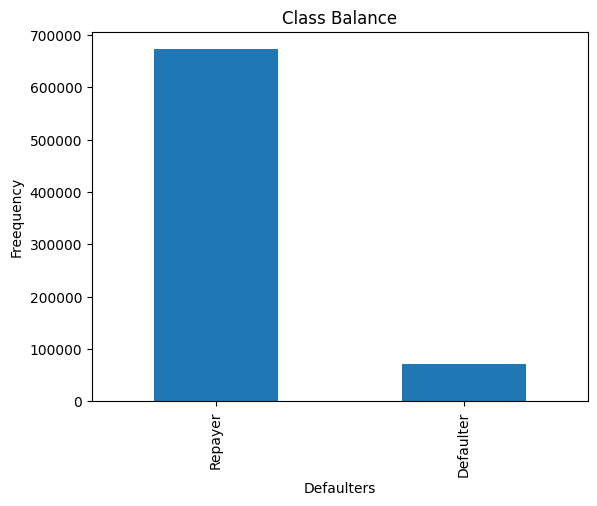

In [4]:
df["TARGET"].value_counts().plot(
 kind = "bar", 
    xlabel = "Defaulters", 
    ylabel = "Freequency", 
    title = "Class Balance"
);

In [5]:
# Extract the features and target variable
X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [6]:
# Perform oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [7]:
X_resampled.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NAME_CONTRACT_TYPE_PREV,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_PREV,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,271877.0,Consumer loans,17145.0,17145.0,XAP,Approved,73.0,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,middle,POS mobile with interest,Cash loans,F,N,Y,1.0,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,14443.0,7392.0,8447.0,4120.0,Laborers,3.0,1.0,1.0,TUESDAY,17.0,0.0,1.0,1.0,0.0,0.0,0.0,Military,3.0,3.0,548.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
1,122040.0,Cash loans,112500.0,136444.5,XNA,Approved,301.0,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,high,Cash X-Sell: high,Cash loans,F,N,Y,3.0,40500.0,284400.0,16456.5,225000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.025164,10541.0,1177.0,1673.0,1964.0,Core staff,5.0,2.0,2.0,TUESDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Postal,4.0,4.0,301.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
2,202054.0,Cash loans,337500.0,404055.0,Repairs,Refused,781.0,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,1.0,XNA,high,Cash Street: high,Cash loans,F,N,N,1.0,180000.0,628069.5,34200.0,499500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.028663,10020.0,2507.0,4331.0,2698.0,Laborers,3.0,2.0,2.0,MONDAY,8.0,1.0,1.0,0.0,1.0,1.0,1.0,Security Ministries,3.0,3.0,280.0,0.000000,0.000,0.000000,1.000000,2.000000,8.000000
3,199383.0,Cash loans,315000.0,340573.5,Everyday expenses,Approved,684.0,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,low_normal,Cash X-Sell: low,Cash loans,M,Y,Y,0.0,157500.0,941472.0,37467.0,841500.0,Family,Working,Secondary / secondary special,Civil marriage,House / apartment,0.025164,21092.0,93.0,321.0,3900.0,Drivers,2.0,2.0,2.0,THURSDAY,7.0,0.0,0.0,0.0,0.0,1.0,1.0,Business Entity Type 3,0.0,0.0,684.0,0.000000,0.000,1.000000,0.000000,0.000000,5.000000
4,342292.0,Cash loans,0.0,0.0,XNA,Canceled,386.0,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,1.0,XNA,XNA,Cash,Cash loans,F,N,N,0.0,157500.0,495351.0,30433.5,459000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,18336.0,1838.0,2504.0,1841.0,Sales staff,2.0,2.0,2.0,TUESDAY,13.0,0.0,0.0,0.0,0.0,0.0,0.0,Self-employed,1.0,1.0,2535.0,0.000000,0.000,0.000000,0.000000,0.000000,5.000000


In [8]:
y_resampled.head()

0    Repayer
1    Repayer
2    Repayer
3    Repayer
4    Repayer
Name: TARGET, dtype: object

In [9]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344732 entries, 0 to 1344731
Data columns (total 59 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1344732 non-null  float64
 1   NAME_CONTRACT_TYPE           1344732 non-null  object 
 2   AMT_APPLICATION              1344732 non-null  float64
 3   AMT_CREDIT                   1344732 non-null  float64
 4   NAME_CASH_LOAN_PURPOSE       1344732 non-null  object 
 5   NAME_CONTRACT_STATUS         1344732 non-null  object 
 6   DAYS_DECISION                1344732 non-null  float64
 7   NAME_PAYMENT_TYPE            1344732 non-null  object 
 8   CODE_REJECT_REASON           1344732 non-null  object 
 9   NAME_CLIENT_TYPE             1344732 non-null  object 
 10  NAME_GOODS_CATEGORY          1344732 non-null  object 
 11  NAME_PORTFOLIO               1344732 non-null  object 
 12  NAME_PRODUCT_TYPE            1344732 non-n

In [10]:
y_resampled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1344732 entries, 0 to 1344731
Series name: TARGET
Non-Null Count    Dtype 
--------------    ----- 
1344732 non-null  object
dtypes: object(1)
memory usage: 10.3+ MB


In [11]:
# Identify categorical columns
categorical_cols = X_resampled.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_resampled.select_dtypes(include=['number']).columns.tolist()

In [12]:
categorical_cols

['NAME_CONTRACT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'NAME_CONTRACT_TYPE_PREV',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [13]:
numerical_cols

['SK_ID_CURR',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_PREV',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [14]:
# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(X_resampled, columns=categorical_cols)

In [15]:
df_encoded.head()

,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,DAYS_DECISION,SELLERPLACE_AREA,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_PREV,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CASH_LOAN_PURPOSE_Building a house or an annex,NAME_CASH_LOAN_PURPOSE_Business development,NAME_CASH_LOAN_PURPOSE_Buying a garage,NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land,NAME_CASH_LOAN_PURPOSE_Buying a home,NAME_CASH_LOAN_PURPOSE_Buying a new car,NAME_CASH_LOAN_PURPOSE_Buying a used car,NAME_CASH_LOAN_PURPOSE_Car repairs,NAME_CASH_LOAN_PURPOSE_Education,NAME_CASH_LOAN_PURPOSE_Everyday expenses,NAME_CASH_LOAN_PURPOSE_Furniture,NAME_CASH_LOAN_PURPOSE_Gasification / water supply,NAME_CASH_LOAN_PURPOSE_Hobby,NAME_CASH_LOAN_PURPOSE_Journey,NAME_CASH_LOAN_PURPOSE_Medicine,NAME_CASH_LOAN_PURPOSE_Money for a third person,NAME_CASH_LOAN_PURPOSE_Other,NAME_CASH_LOAN_PURPOSE_Payments on other loans,NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment,NAME_CASH_LOAN_PURPOSE_Refusal to name the goal,NAME_CASH_LOAN_PURPOSE_Repairs,NAME_CASH_LOAN_PURPOSE_Urgent needs,NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,NAME_PAYMENT_TYPE_Cash through the bank,NAME_PAYMENT_TYPE_Cashless from the account of the employer,NAME_PAYMENT_TYPE_Non-cash from your account,NAME_PAYMENT_TYPE_XNA,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,NAME_CLIENT_TYPE_New,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_CLIENT_TYPE_XNA,NAME_GOODS_CATEGORY_Additional Service,NAME_GOODS_CATEGORY_Animals,NAME_GOODS_CATEGORY_Audio/Video,NAME_GOODS_CATEGORY_Auto Accessories,NAME_GOODS_CATEGORY_Clothing and Accessories,NAME_GOODS_CATEGORY_Computers,NAME_GOODS_CATEGORY_Construction Materials,NAME_GOODS_CATEGORY_Consumer Electronics,NAME_GOODS_CATEGORY_Direct Sales,NAME_GOODS_CATEGORY_Education,NAME_GOODS_CATEGORY_Fitness,NAME_GOODS_CATEGORY_Furniture,NAME_GOODS_CATEGORY_Gardening,NAME_GOODS_CATEGORY_Homewares,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Jewelry,NAME_GOODS_CATEGORY_Medical Supplies,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA,NAME_PORTFOLIO_Cards,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_PRODUCT_TYPE_XNA,NAME_PRODUCT_TYPE_walk-in,NAME_PRODUCT_TYPE_x-sell,CHANNEL_TYPE_AP+ (Cash loan),CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Regional / Local,CHANNEL_TYPE_Stone,NAME_SELLER_INDUSTRY_Auto technology,NAME_SELLER_INDUSTRY_Clothing,NAME_SELLER_INDUSTRY_Connectivity,NAME_SELLER_INDUSTRY_Construction,NAME_SELLER_INDUSTRY_Consumer electronics,NAME_SELLER_INDUSTRY_Furniture,NAME_SELLER_INDUSTRY_Industry,NAME_SELLER_INDUSTRY_Jewelry,NAME_SELLER_INDUSTRY_MLM partners,NAME_SELLER_INDUSTRY_Tourism,NAME_SELLER_

In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344732 entries, 0 to 1344731
Columns: 278 entries, SK_ID_CURR to ORGANIZATION_TYPE_University
dtypes: bool(244), float64(34)
memory usage: 661.7 MB


In [17]:
imp_features = ['DAYS_EMPLOYED','DAYS_BIRTH','AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_REGISTRATION',
                'SK_ID_CURR','AMT_CREDIT_PREV','REGION_POPULATION_RELATIVE','AMT_INCOME_TOTAL','AMT_GOODS_PRICE',
                'AMT_REQ_CREDIT_BUREAU_YEAR','HOUR_APPR_PROCESS_START','NAME_EDUCATION_TYPE_Higher education','DAYS_DECISION',
                'OBS_60_CNT_SOCIAL_CIRCLE']

In [18]:
imp_feat_df = df_encoded[imp_features]

In [19]:
new_df = pd.concat([imp_feat_df,y_resampled],axis=1)

In [20]:
new_df.head()

,DAYS_EMPLOYED,DAYS_BIRTH,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,SK_ID_CURR,AMT_CREDIT_PREV,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_YEAR,HOUR_APPR_PROCESS_START,NAME_EDUCATION_TYPE_Higher education,DAYS_DECISION,OBS_60_CNT_SOCIAL_CIRCLE,TARGET
0,7392.0,14443.0,25803.0,548.0,4120.0,8447.0,271877.0,533668.5,0.046220,225000.0,477000.0,0.000000,17.0,False,73.0,3.0,Repayer
1,1177.0,10541.0,16456.5,301.0,1964.0,1673.0,122040.0,284400.0,0.025164,40500.0,225000.0,1.899974,9.0,False,301.0,4.0,Repayer
2,2507.0,10020.0,34200.0,280.0,2698.0,4331.0,202054.0,628069.5,0.028663,180000.0,499500.0,8.000000,8.0,False,781.0,3.0,Repayer
3,93.0,21092.0,37467.0,684.0,3900.0,321.0,199383.0,941472.0,0.025164,157500.0,841500.0,5.000000,7.0,False,684.0,0.0,Repayer
4,1838.0,18336.0,30433.5,2535.0,1841.0,2504.0,342292.0,495351.0,0.025164,157500.0,459000.0,5.000000,13.0,False,386.0,1.0,Repayer


In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344732 entries, 0 to 1344731
Data columns (total 17 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   DAYS_EMPLOYED                         1344732 non-null  float64
 1   DAYS_BIRTH                            1344732 non-null  float64
 2   AMT_ANNUITY                           1344732 non-null  float64
 3   DAYS_LAST_PHONE_CHANGE                1344732 non-null  float64
 4   DAYS_ID_PUBLISH                       1344732 non-null  float64
 5   DAYS_REGISTRATION                     1344732 non-null  float64
 6   SK_ID_CURR                            1344732 non-null  float64
 7   AMT_CREDIT_PREV                       1344732 non-null  float64
 8   REGION_POPULATION_RELATIVE            1344732 non-null  float64
 9   AMT_INCOME_TOTAL                      1344732 non-null  float64
 10  AMT_GOODS_PRICE                       1344732 non-null

In [22]:
new_df['TARGET'].value_counts()

TARGET
Repayer      672366
Defaulter    672366
Name: count, dtype: int64

In [23]:
# Extract the features and target variable
X = new_df.drop('TARGET', axis=1)
y = new_df['TARGET']

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = DecisionTreeClassifier(random_state=42)

In [26]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.9931027302777127


In [28]:
y_pred = model.predict(X_test)

In [29]:
y_test[:5]

1296225    Defaulter
1171843    Defaulter
678276       Repayer
969114     Defaulter
53198        Repayer
Name: TARGET, dtype: object

In [30]:
y_pred

array(['Defaulter', 'Defaulter', 'Repayer', ..., 'Repayer', 'Defaulter',
       'Defaulter'], dtype=object)

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)

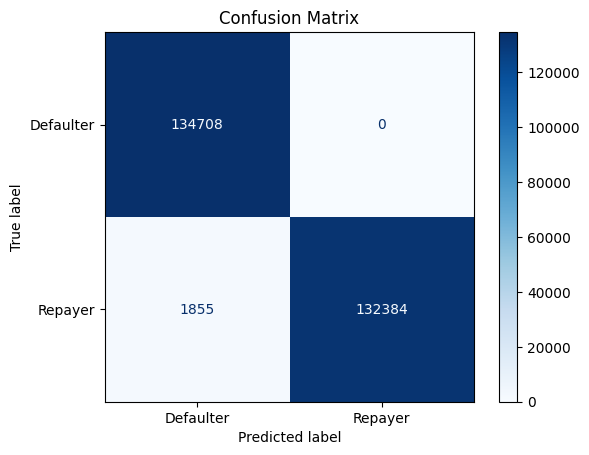

In [32]:
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [33]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

   Defaulter       0.99      1.00      0.99    134708
     Repayer       1.00      0.99      0.99    134239

    accuracy                           0.99    268947
   macro avg       0.99      0.99      0.99    268947
weighted avg       0.99      0.99      0.99    268947



In [34]:
tree_depth_classifier = model.tree_.max_depth
print(f"Depth of the Decision Tree Classifier: {tree_depth_classifier}")


Depth of the Decision Tree Classifier: 60


In [35]:
feature_names = X_train.columns
print("Feature names:", feature_names)

Feature names: Index(['DAYS_EMPLOYED', 'DAYS_BIRTH', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'SK_ID_CURR', 'AMT_CREDIT_PREV',
       'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'HOUR_APPR_PROCESS_START',
       'NAME_EDUCATION_TYPE_Higher education', 'DAYS_DECISION',
       'OBS_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')


In [36]:
importances = model.feature_importances_
print("Feature importances:", importances)

Feature importances: [0.10197969 0.09219133 0.08276901 0.08710386 0.08471579 0.08748488
 0.08472772 0.06176447 0.07078121 0.0571605  0.04731778 0.04576766
 0.04731702 0.01134098 0.01311581 0.02446229]


In [37]:
# Putting importances into a Series
feature_imp = pd.Series(importances, index=feature_names).sort_values()

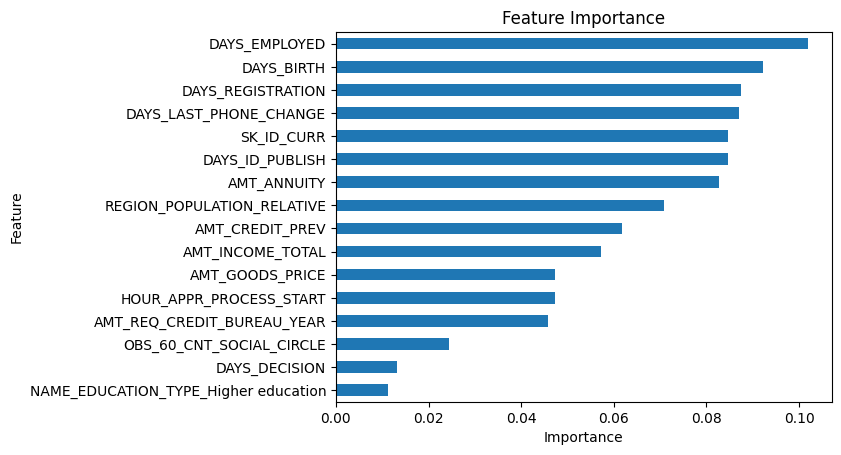

In [38]:
# Plotting series
feature_imp.plot(kind = "barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [56]:
pickle.dump(model, open('C:/Users/rajpu/OneDrive/Desktop/Bank Loan Case Study/Cleaned Datasets/Data Cleaning Notebooks/Final_Prediction_Model.pkl','wb'))

In [43]:
model_loaded = pickle.load(open('C:/Users/rajpu/OneDrive/Desktop/Bank Loan Case Study/Cleaned Datasets/Data Cleaning Notebooks/Final_Prediction_Model.pkl','rb'))

In [45]:
X_test = X_train[50:55]

In [46]:
X_test

,DAYS_EMPLOYED,DAYS_BIRTH,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,SK_ID_CURR,AMT_CREDIT_PREV,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_YEAR,HOUR_APPR_PROCESS_START,NAME_EDUCATION_TYPE_Higher education,DAYS_DECISION,OBS_60_CNT_SOCIAL_CIRCLE
1212661,4852.0,16222.0,26964.0,0.0,5154.0,3537.0,305768.0,557770.5,0.008068,112500.0,481500.0,2.000000,7.0,False,959.0,0.0
626455,409.0,19862.0,41692.5,311.0,3359.0,11962.0,155620.0,1288350.0,0.008230,270000.0,1125000.0,1.899974,10.0,True,240.0,0.0
352749,3974.0,18343.0,9562.5,973.0,1872.0,10998.0,343585.0,83403.0,0.030755,90000.0,72000.0,5.000000,9.0,False,1847.0,0.0
342921,3195.0,12011.0,26640.0,2158.0,1142.0,3084.0,188061.0,545040.0,0.007020,225000.0,450000.0,1.000000,14.0,False,2391.0,0.0
1107171,827.0,10049.0,16965.0,601.0,2366.0,2983.0,331522.0,312768.0,0.010500,157500.0,270000.0,1.899974,18.0,False,601.0,3.0


In [47]:
model_loaded.predict(X_test)

array(['Defaulter', 'Repayer', 'Repayer', 'Repayer', 'Defaulter'],
      dtype=object)

In [48]:
actual_values = y_train[50:55]

In [49]:
actual_values

1212661    Defaulter
626455       Repayer
352749       Repayer
342921       Repayer
1107171    Defaulter
Name: TARGET, dtype: object